<a href="https://colab.research.google.com/github/Stark-developer01/Ankuran-App/blob/master/Image_Processing_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This program detects breast cancer based on data samples

In [3]:
#importing the essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#loading the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(50)

Saving data.csv to data (4).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,1.0950,0.9053,8.589,153.400,0.006399,0.049040,0.05373,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,0.05667,0.5435,0.7339,3.398,74.080,0.005225,0.013080,0.01860,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,0.7456,0.7869,4.585,94.030,0.006150,0.040060,0.03832,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.074580,0.05661,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.440,0.011490,0.024610,0.05688,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,0.07613,0.3345,0.8902,2.217,27.190,0.007510,0.033450,0.03672,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,0.4467,0.7732,3.180,53.910,0.004314,0.013820,0.02254,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,0.07451,0.5835,1.3770,3.856,50.960,0.008805,0.030290,0.02488,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,0.3063,1.0020,2.406,24.320,0.005731,0.035020,0.03553,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.072170,0.07743,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [5]:
#Number of empty or invalid values (NaN, NAN, na) in each of the column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.shape

(569, 33)

In [7]:
#Dropping the column with no values that is "Unnamed: 32"
df = df.dropna(axis=1)
#Getting the new count
df.shape

(569, 32)

In [8]:
#Getting a count of the Malignant(M) or Benign(B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


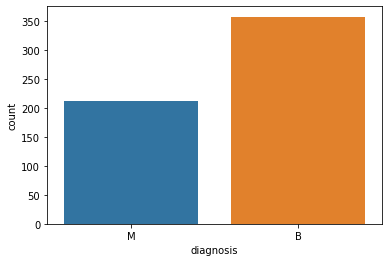

In [9]:
#Visualizing the Count
sns.countplot(df['diagnosis'], label='count')

In [10]:
#Discovering the data types of all the columns to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
df.shape

(569, 32)

In [12]:
#Define the dependent variable that needs to be predicted

Y = df.iloc[:,1].values
print("Labels before encoding are: ", np.unique(Y))

Labels before encoding are:  ['B' 'M']


In [13]:
#Encoding the categorical data values
from sklearn import preprocessing
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print("Labels after encoding are : ", np.unique(Y))

Labels after encoding are :  [0 1]


In [14]:
#Defining X and Normalizing/Scaling the values
X = df.iloc[:,2:31].values
print(X)

[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]


In [15]:
#Scaling / Normalizing the values to bring them in the same range

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X) #Scaled Values

[[0.52103744 0.0226581  0.54598853 ... 0.56861022 0.91202749 0.59846245]
 [0.64314449 0.27257355 0.61578329 ... 0.19297125 0.63917526 0.23358959]
 [0.60149557 0.3902604  0.59574321 ... 0.35974441 0.83505155 0.40370589]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.27180511 0.48728522 0.12872068]
 [0.64456434 0.66351031 0.66553797 ... 0.74976038 0.91065292 0.49714173]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.         0.25744136]]


In [16]:
#Splitting the dataset into 75% for training purpose and 25% for testing purpose
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print("Shape of the training data : ", X_train.shape)
print("Shape of the testing data : ", X_test.shape)

Shape of the training data :  (426, 29)
Shape of the testing data :  (143, 29)


In [14]:
#Scaling the data (Feature Scaling)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

In [17]:
#Importing the Keras Models for Deep Learning
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [18]:
#Defining the Deep Learning Model
model = Sequential()
model.add(Dense(16, input_dim=29, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
#Fitting with no early stopping or other callbacks
history = model.fit(X_train, Y_train, verbose=1, epochs=100, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1496 - accuracy: 0.9531 - val_loss: 0.1574 - val_accuracy: 0.9441
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1509 - accuracy: 0.9413 - val_loss: 0.1570 - val_accuracy: 0.9371
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1555 - accuracy: 0.9390 - val_loss: 0.1559 - val_accuracy: 0.9441
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1542 - accuracy: 0.9437 - val_loss: 0.1555 - val_accuracy: 0.9441
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1542 - accuracy: 0.9531 - val_loss: 0.1540 - val_accuracy: 0.9510
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1452 - accuracy: 0.9531 - val_loss: 0.1530 - val_accuracy: 0.9510
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1570 - accuracy: 0.9437 - val_loss: 0.1524 - val_accuracy: 0.9510
Epoch 8/100
7/7 [==========

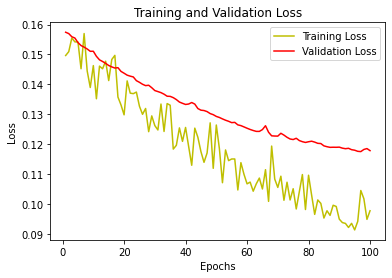

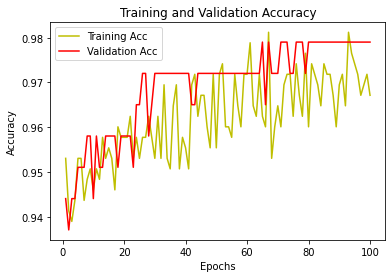

In [30]:
#Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
#Predicting the test set results
y_pred = model.predict(X_test)
print(y_pred)

[[9.68342423e-01]
 [5.32946251e-02]
 [1.11782411e-02]
 [7.34997019e-02]
 [2.59355479e-03]
 [9.97163914e-03]
 [8.29527713e-03]
 [4.69731307e-03]
 [6.59186684e-04]
 [9.35868156e-05]
 [2.25390568e-01]
 [1.01851605e-01]
 [1.26719719e-03]
 [4.82869118e-01]
 [4.66386169e-01]
 [9.68913853e-01]
 [8.77329800e-03]
 [9.95666862e-01]
 [9.83734846e-01]
 [9.99404907e-01]
 [9.36542153e-01]
 [9.68710542e-01]
 [5.72398752e-02]
 [8.51757452e-03]
 [9.86680448e-01]
 [1.10989399e-02]
 [3.67271341e-03]
 [9.55082476e-01]
 [1.16102193e-02]
 [9.95033264e-01]
 [1.13718293e-03]
 [9.84254837e-01]
 [3.89313221e-01]
 [9.64275420e-01]
 [5.18016983e-04]
 [9.61843431e-01]
 [5.74729741e-02]
 [9.80299354e-01]
 [3.17679159e-02]
 [9.66430366e-01]
 [6.15843058e-01]
 [2.19231355e-03]
 [7.17130661e-01]
 [1.30205578e-03]
 [2.83905178e-01]
 [9.99494195e-01]
 [2.82364985e-04]
 [1.97545961e-02]
 [2.96970224e-03]
 [9.84729707e-01]
 [9.93585408e-01]
 [9.23165858e-01]
 [9.88212883e-01]
 [1.32603990e-02]
 [1.50964167e-02]
 [2.959098

In [37]:
#Printing the prediction of Deep Neural Networks
print('Values predicted by the Random Forest Classifier Model - \n', y_pred)
print()
print('Actual Values \n', Y_test)

Values predicted by the Random Forest Classifier Model - 
 [[ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ Tr

In [32]:
y_pred = (y_pred > 0.5)

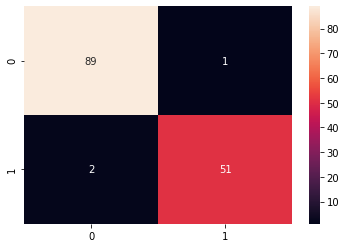

In [33]:
#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True)

In [35]:
#Easier way to get the metrics of the Models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print('Model - ')
print(classification_report(Y_test, y_pred))
print('Testing accuracy of the Model using Deep Neural Networks is -', accuracy_score(Y_test, y_pred))
print()

Model - 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Testing accuracy of the Model using Deep Neural Networks is - 0.9790209790209791

